### import laibreries 

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score, accuracy_score, mean_squared_error as mse, mean_absolute_error as mae
#from sklearn import Label_Encoder
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Exploratory Data Analysis

In [186]:
data=pd.read_csv("germany-cars-zenrows.csv")
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [187]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


there some messing values in  model, gear,hp
we have enough data, so we can drop all messing values

In [188]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46071 entries, 0 to 46070
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   make       46071 non-null  object 
 2   model      46071 non-null  object 
 3   fuel       46071 non-null  object 
 4   gear       46071 non-null  object 
 5   offerType  46071 non-null  object 
 6   price      46071 non-null  int64  
 7   hp         46071 non-null  float64
 8   year       46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [189]:
data.describe()

,mileage,price,hp,year
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


lets replace year by age (time of now - year)

In [190]:
from datetime import datetime

data["age"]=datetime.now().year-data["year"]
data.drop(columns=["year"],inplace=True)
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,12
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,12
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,12
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,12
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,12


### Data Viz

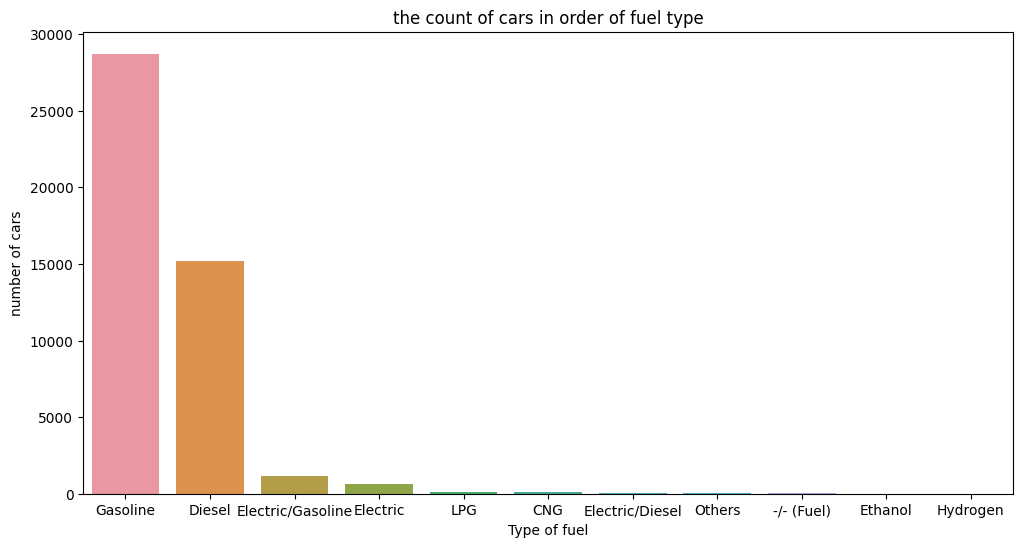

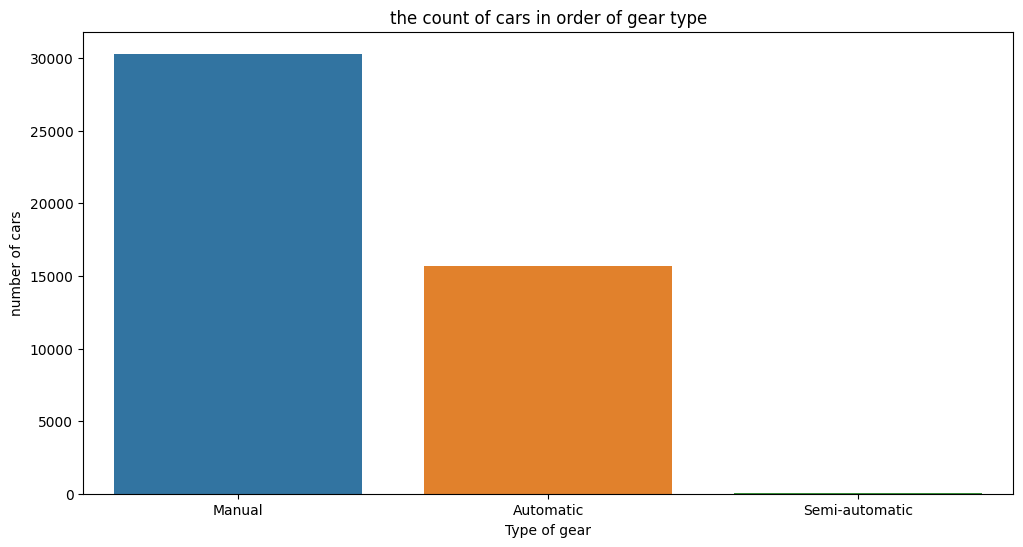

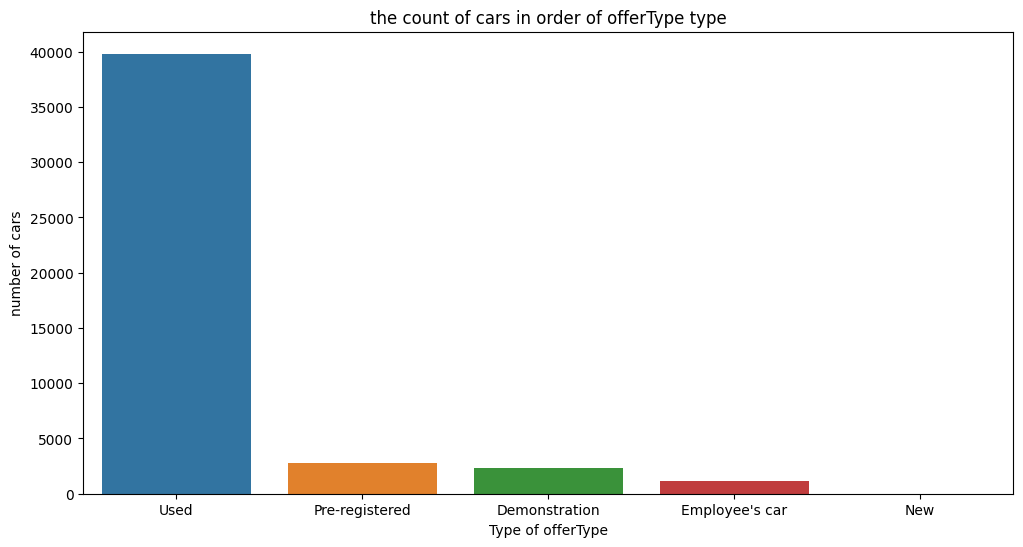

In [191]:
#lets see the count of cars in order of fuel type, than gear type and last offer type 
features=["fuel","gear","offerType"]
for feature in features :
    ftr_count=data[feature].value_counts().to_frame()
    plt.figure(figsize=(12,6))
    sns.barplot(data=data,y=ftr_count[feature],x=ftr_count.index)
    plt.xlabel("Type of "+ feature)
    plt.ylabel("number of cars")
    plt.title('the count of cars in order of ' +feature+' type')
    plt.show()


In [192]:
features=["fuel","gear","offerType"]
for feature in features :
    px.bar(data,x=feature,y="price")
#px.bar(data,x="fuel",y="price")    

lets see the mean of price for each marke and model

In [193]:
px.sunburst(data,names="make",values="price",
            path=["make","model"],
           width=600,height=600)

In [194]:
grpby_price=data[["model","make","price"]].groupby(["make","model"]).mean()
top100_make=grpby_price.sort_values(by="price",ascending=False).reset_index()
top100_make
px.treemap(top100_make,values="price",path=["make","model"],width=900,
          height=600)
#table = pd.pivot_table(data,index=['make','model'],values=['price'], aggfunc=np.mean)


In [195]:
px.treemap(data,values="price",path=["make","model"],
           color="make",color_continuous_scale='balance',width=900,
          height=600)
#sns.heatmap()

### Know we can evalute the correlation between price and other features 

In [196]:
price_corr=data.corr()

px.imshow(price_corr,text_auto=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9880\4043549447.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: xlabel='hp', ylabel='price'>

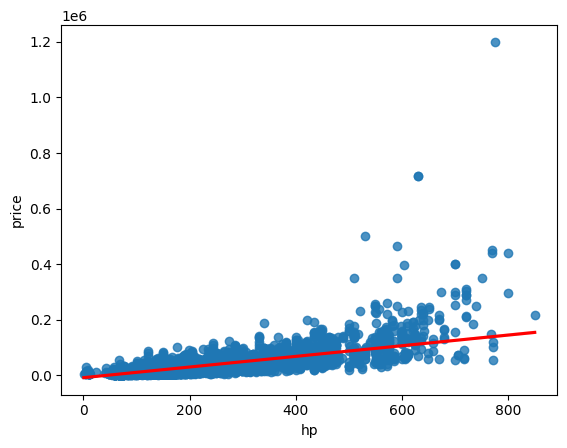

In [197]:
sns.regplot(data,x="hp",y="price",line_kws={"color":"red"})

<Axes: xlabel='mileage', ylabel='price'>

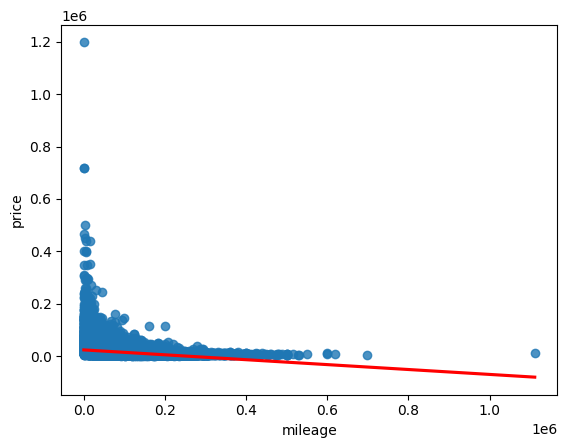

In [198]:
sns.regplot(data,x="mileage",y="price",line_kws={"color":"red"},marker='o')

<Axes: xlabel='age', ylabel='price'>

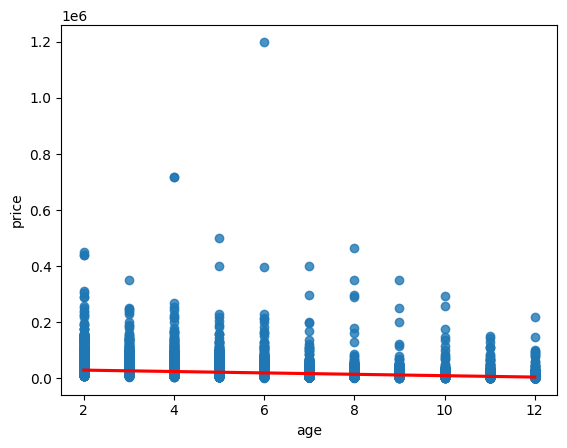

In [199]:
sns.regplot(data,x="age",y="price",line_kws={"color":"red"},marker='o')

We can relase that horpower have a big impact on price , mileage, and age are less correlated with
price.

get dummies for fue,gear and offerType

In [200]:
data=pd.get_dummies(data,columns=["fuel","gear","offerType"])

In [201]:
data.head()

,mileage,make,model,price,hp,age,fuel_-/- (Fuel),fuel_CNG,fuel_Diesel,fuel_Electric,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,BMW,316,6800,116.0,12,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,92800,Volkswagen,Golf,6877,122.0,12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,SEAT,Exeo,6900,160.0,12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,Renault,Megane,6950,110.0,12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,Peugeot,308,6950,156.0,12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Data Processing

1\extracting the most important features and regulaze our data 

In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [203]:
X=data.drop(columns=["price","make","model"])
pca=PCA(n_components=4)
PCA_X=pca.fit_transform(X)

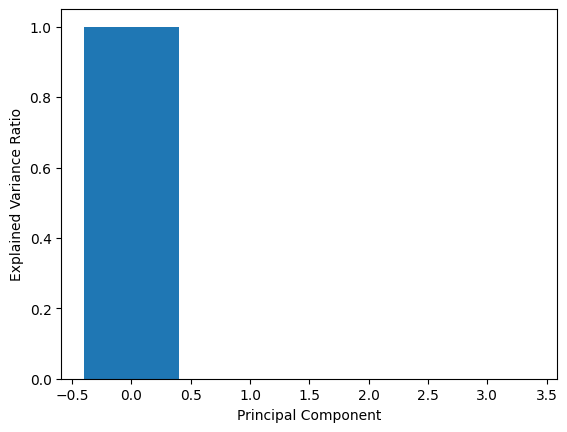

array([9.99998554e-01, 1.44476680e-06, 1.33063569e-09, 9.76582277e-11])

In [204]:

plt.bar(range(0, 4), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()
pca.explained_variance_ratio_

In [205]:
scaled_X=StandardScaler().fit_transform(PCA_X)
Y=data["price"].astype("float")
print(PCA_X[0:5])
#print(scaled_X[0:5])

[[ 1.63766864e+05 -1.40558395e+01  7.14879618e-01  5.39795113e-02]
 [ 2.15668637e+04 -1.06374527e+01 -4.24391014e+00  3.64732843e-01]
 [ 7.80668630e+04  2.83858771e+01 -2.59271359e+00  8.11278733e-01]
 [ 2.49668639e+04 -2.25753769e+01 -4.04603386e+00  3.34327373e-01]
 [ 8.47668631e+04  2.45075224e+01 -2.33825464e+00  8.30129571e-01]]


###  Data Modeling 

#### Model 1 : Linear Regression 

In [206]:
# use X predictors, All features except made and model
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
x_train.shape,y_train.shape,x_test.shape,y_test.shape
LR=LinearRegression()
LR.fit(x_train,y_train)
yhat=LR.predict(x_test)
print("mse:",mse(yhat,y_test))
print("mae:",mae(yhat,y_test))
print("r2_score:",r2_score(yhat,y_test))

mse: 179982191.27264604
mae: 4526.641386575737
r2_score: 0.25989118742919726


In [207]:
#using PCA_X
x_train,x_test,y_train,y_test=train_test_split(PCA_X,Y,test_size=0.3,random_state=1000)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((32249, 4), (32249,), (13822, 4), (13822,))

In [208]:
LR2=LinearRegression()
LR2.fit(x_train,y_train)
yhat=LR2.predict(x_test)
print("r2_score:",r2_score(yhat,y_test),"accuracy:",
     "mse:",mse(yhat,y_test),"mae:",mae(yhat,y_test))

r2_score: 0.4662825617263212 accuracy: mse: 130766609.48697753 mae: 4602.448766078883


In [209]:
#using Scaled_X
x_train,x_test,y_train,y_test=train_test_split(scaled_X,Y,test_size=0.3,random_state=600)
LR3=LinearRegression()
LR3.fit(x_train,y_train)
yhat=LR3.predict(x_test)
print("r2_score:",r2_score(yhat,y_test),"accuracy:",
     "mse:",mse(yhat,y_test),"mae:",mae(yhat,y_test))

r2_score: 0.6556458857790102 accuracy: mse: 85158553.54985763 mae: 4576.9541120942395


In [210]:
#using hp and age as predictors
X1=data[["hp","age"]].astype(float).values
Y1=data[["price"]].astype(float).values

In [211]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.3,random_state=1600)
x_train.shape,y_train.shape,x_test.shape,y_test.shape
LR1=LinearRegression()
LR1.fit(x_train,y_train)
yhat=LR1.predict(x_test)
print("score=",r2_score(yhat,y_test))

score= 0.6560779996405721


   ####      Cross Validation

In [212]:
cross_LR=LinearRegression()
cross_scores=cross_val_score(cross_LR,X1,Y,cv=4)
predictions=cross_val_predict(cross_LR,X1,Y,cv=4)
predictions
cross_scores.mean()

0.6485648663607997

### Polynomial Regression

In [213]:
from sklearn.preprocessing import PolynomialFeatures

In [214]:
lrp=LinearRegression()
scores=[]
degrees=np.arange(1,11)
for n in degrees:
    pf=PolynomialFeatures(degree=n)
    x_train_pf=pf.fit_transform(x_train)
    x_test_pf=pf.fit_transform(x_test)
    lrp.fit(x_train_pf,y_train)
    yhat=lrp.predict(x_test_pf)
    scores.append(r2_score(yhat,y_test))
    

the best degree is : 1
the best score is : 0.7881129051489719


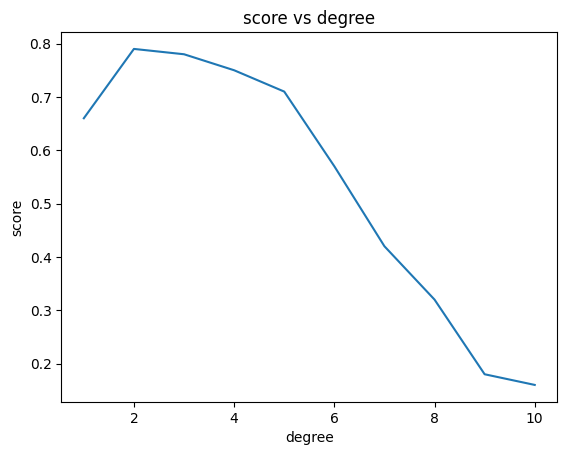

In [215]:
sns.lineplot(x=degrees,y=np.round(scores,2))
plt.xlabel("degree")
plt.ylabel("score")
plt.title("score vs degree")
print('the best degree is :',np.array(scores).argmax())
print('the best score is :',max(scores))


78.84 % if data are fited by the Polynomial Regression Model, 

#### Cross Validation 

the best degree is : 2
the best score is : 0.73


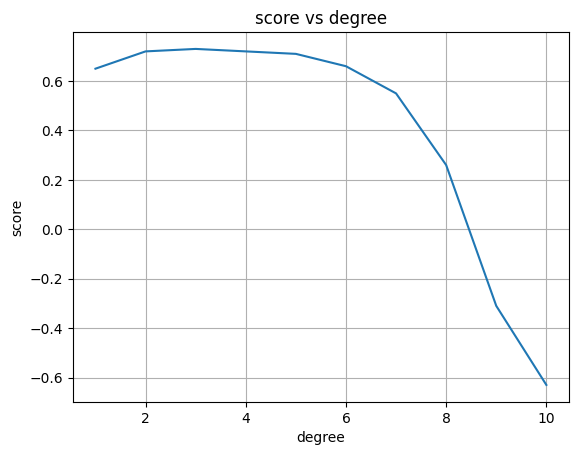

In [216]:
cross_val_scores=[]
for n in degrees:
    pf=PolynomialFeatures(degree=n)
    x_data=pf.fit_transform(X1)
    scores=cross_val_score(lrp,x_data,Y,cv=4)
    cross_val_scores.append(np.round(scores.mean(),2))
   
print('the best degree is :',np.array(cross_val_scores).argmax())
print('the best score is :',max(cross_val_scores))  
plt.figure(clear=True)
sns.lineplot(x=degrees,y=np.round(cross_val_scores,2))
plt.xlabel("degree")
plt.ylabel("score")
plt.title("score vs degree")
plt.grid()


### Grid Search

In [251]:
degrees={"degree":np.arange(1,100)}
pf=PolynomialFeatures()
gsc=GridSearchCV(pf,param_grid=degrees,scoring='neg_mean_squared_error',cv=4)
gsc.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
 

GridSearchCV(cv=4, estimator=PolynomialFeatures(),
             param_grid={'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_squared_error')

In [260]:
param_grid = {
    'poly__degree': [1, 2, 3, 4],
    'ridge__alpha': [0.1, 1, 10]}
# create a pipeline that includes polynomial features and Ridge regression
poly_reg = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# perform grid search using cross-validation
grid_search = GridSearchCV(poly_reg, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(x_test)
mse_ = mse(y_test, y_pred)
print('Test MSE:', mse_)
r2_score(y_test, y_pred)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.16705e-21): result may not be accurate.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.13957e-21): result may not be accurate.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.48805e-21): result may not be accurate.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond

Test MSE: 89478466.65898119


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.46669e-24): result may not be accurate.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.09736e-24): result may not be accurate.



0.7164191494422721

## Ridge Regression

In [217]:
from sklearn.linear_model import Ridge

In [231]:

alpha_=[1,0,0.1,0.01,0.001,0.0001]
ridge_scores=[]
for n in alpha_:
    RR=Ridge(alpha=n)
    RR.fit(x_train,y_train)
    yhat=RR.predict(x_test)
    n_score=r2_score(yhat,y_test)
    ridge_scores.append(np.round(n_score,2))
ridge_scores

[0.66, 0.66, 0.66, 0.66, 0.66, 0.66]

### Grid Search

Grid search is a hyperparameter tuning technique used in machine learning and optimization to search for the optimal combination of hyperparameters for a given model.

In grid search, a set of hyperparameters and their respective values are defined as a grid, and the algorithm exhaustively searches over all the possible combinations of these hyperparameters to find the combination that results in the best performance metric for the model.

In [240]:
param={"alpha":[0,1,0.1,0.001,0.0001]}
RR=Ridge()
gsc=GridSearchCV(RR,param,cv=4)
gsc.fit(x_train,y_train)
yhat=gsc.predict(x_test)
r2_score(yhat,y_test)
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", gsc.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(gsc.best_score_))

Best Hyperparameters:  {'alpha': 0}
Best Mean Cross-validation score: 0.62
